# Hierarchical Clustering and Cluster Evaluation

For this project, we will consider presidential elections of years past and do some exploratory grouping of states based on the results of the 2008, 2012, and 2016 presidential elections. 

The data we have is from the [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections) and split into two files:
- `votes_by_state.csv` has the raw number of ballots cast for each of the top presidential candidates from 2008, 2012, and 2016 by US State (and the District of Columbia)
- `republican_percentage_by_state.csv` has the percentage of votes that were for the Republican candidate for 2008, 2012, and 2016 by US State (and the District of Columbia)
  
Our task is to group together states using different hierarchical agglomerative methodologies and compare the results.  You can imagine how finding states that tend to vote similarly to each other might be useful for election predictions, or for identifying swing states as part of a political campaign to invest in.

In [1]:
# Do not import any libraries (i.e. sklearn, scipy, etc.), except for
# Python builtin libraries, unless otherwise specified.

# Our regular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# For our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# For k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

## Q1 

**Using different proximity functions**

[SciPy](https://scipy.org/) is a scientific computing library for Python that we haven't used much in this class, but can be useful. Conveniently, it has libraries for [library for hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) and for [plotting dendrograms](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram). 

Using these libraries, **plot the hierarchical clusters formed** from the raw vote count (`votes_by_state.csv`) using three different proximity measures:
1. Ward
2. Min
3. Max

*Notes*:
- The $x$-axis of each dendrogram should be labeled with the state's **name** (and not the index of the state in the data frame).
- The title of each dendrogram should reflect what proximity measure you used to create the clusters.
- Use **only the number of votes cast** as attributes. State names are the labels on each row of data.
- To make the plot legible you will have to change the plot size. `figsize=(12,8)` should work well, but you are free to adjust it as you see fit.


<!-- BEGIN QUESTION -->



In [2]:
# Load the data into df_X, and:
# 1. Split the state names into another series, s_states
# 2. Drop the state column from df_X, just leaving the attributes in df_X.
df_X = pd.read_csv('votes_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop('State', axis=1)
df_X

,Clinton,Trump,Johnson,Obama 2012,Romney,Obama 2008,McCain
0,729547,1318255,44467,795696,1255925,813479,1266546
1,116454,163387,18725,122640,164676,123594,193841
2,1161167,1252401,106327,1025232,1233654,1034707,1230111
3,380494,684872,29829,394409,647744,422310,638017
4,8753788,4483810,478500,7854285,4839958,8274473,5011781
5,1338870,1202484,144121,1323101,1185243,1288576,1073589
6,897572,673215,48676,905083,634892,997772,629428
7,235603,185127,14757,242584,165484,255459,152374
8,282830,12723,4906,267070,21381,245800,17367
9,4504975,4617886,207043,4237756,4163447,4282074,4045624


Text(0.5, 1.0, 'Hierarchical Clusters Using Ward Metric')

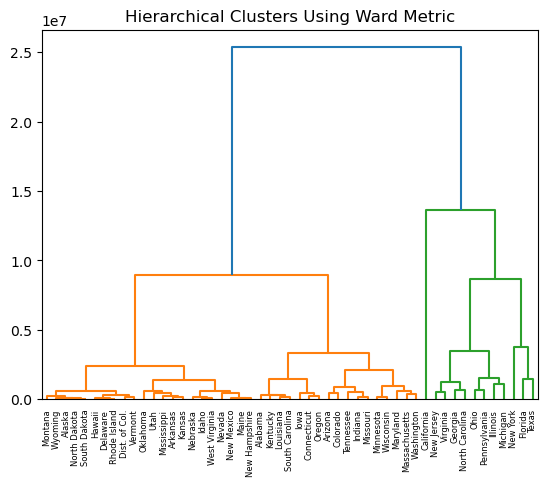

In [3]:
# Plot the dendrogram for the Ward proximity measure
# Get the linkage. Store the result in a variable called Z_ward.
Z_ward = linkage(df_X.values, method='ward')

# Plot the dendrogram. Store the result in a variable called dn_ward.
dn_ward = dendrogram(Z_ward, labels=s_states.to_list())
plt.figure(1,figsize=(15,10),FigureClass=dn_ward)
plt.title("Hierarchical Clusters Using Ward Metric")
#dn_ward

Text(0.5, 1.0, 'Hierarchical Clusters Using MIN Metric')

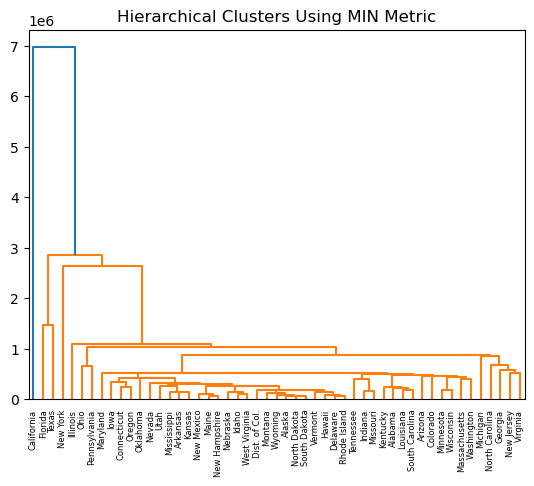

In [4]:
# Plot the dendrogram for the min proximity measure
# Get the linkage. Store the result in a variable called Z_min.
Z_min = linkage(df_X.values, 'single')

# Plot the dendrogram. Store the result in a variable called dn_min.
dn_min = dendrogram(Z_min,labels=s_states.to_list())
plt.figure(1,figsize=(15,10),FigureClass=dn_min)
plt.title("Hierarchical Clusters Using MIN Metric")

Text(0.5, 1.0, 'Hierarchical Clusters Using MAX Metric')

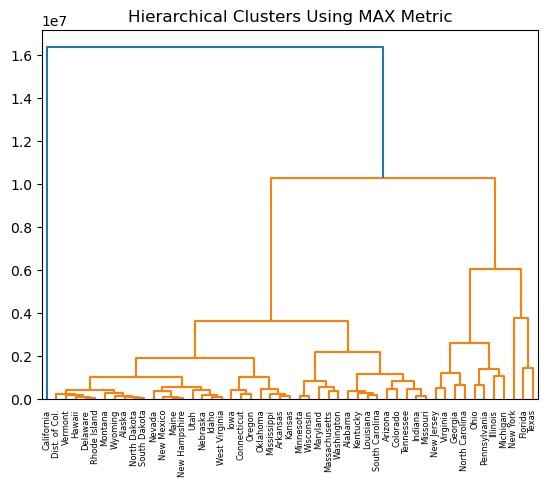

In [5]:
# Plot the dendrogram for the max proximity measure
# Get the linkage. Store the result in a variable called Z_max.
Z_max = linkage(df_X.values, 'complete')

# Plot the dendrogram. Store the result in a variable called dn_min.
dn_max = dendrogram(Z_max,labels=s_states.to_list())
plt.figure(1,figsize=(15,10),FigureClass=dn_max)
plt.title("Hierarchical Clusters Using MAX Metric")

<!-- END QUESTION -->

## Q2

**Using different proximity functions (redux)**

A close observer may notice some odd trends in the above graphs. For example, New York is closer to Texas than it is to California in all of those graphs. You may think to yourself, "Self, how could this be?" You also might notice that tiny states like Montana, Wyoming, and Alaska all tend to cluster together in all of these scenarios. 

At this point, your data science brain might be noticing that the _population_ of that state seems to be more important than which party _won_ the state.  You decide to engineer the data such that you reduce the dimensions down from 7 attributes, to 3 attributes, where each column is the _percentage_ of votes that were cast to the Republican candidate, and a 4th attribute indicating the range of percentages across the 3 elections.  We went ahead and did this for you, and created the file `republican_percentage_by_state.csv`.

Just like in Q1, **plot the hierarchical clusters formed** using three different proximity measures, but **now using the percentage of ballots cast by Republicans** (`republican_percentage_by_state.csv`):
1. Ward
2. Min
3. Max

*Notes*:
- The $x$-axis of each dendrogram should be labeled with the state's **name** (and not the index of the state in the data frame).
- The title of each dendrogram should reflect what proximity measure you used to create the clusters.
- Use **only the percentages of votes cast** as attributes. State names are the labels on each row of data.
- To make the plot legible you will have to change the plot size. `figsize=(12,8)` should work well, but you are free to adjust it as you see fit.


<!-- BEGIN QUESTION -->



In [6]:
# Load the data into df_X_pct, and:
# 1. Split the state names into another series, s_states_pct
# 2. Drop the state column from df_X_pct, just leaving the attributes in df_X_pct.
df_X_pct = pd.read_csv('republican_percentage_by_state.csv')
s_states_pct = df_X_pct['State']
df_X_pct = df_X_pct.drop('State', axis=1)
df_X_pct

,2016,2012,2008,range
0,0.630060,0.612162,0.608909,0.021151
1,0.547239,0.573153,0.610648,0.063409
2,0.497005,0.546134,0.543139,0.049129
3,0.625343,0.621544,0.601717,0.023625
4,0.326901,0.381272,0.377216,0.054371
5,0.447773,0.472520,0.454494,0.024747
6,0.415703,0.412274,0.386817,0.028886
7,0.425103,0.405530,0.373619,0.051485
8,0.042345,0.074124,0.065992,0.031778
9,0.494955,0.495577,0.485803,0.009774


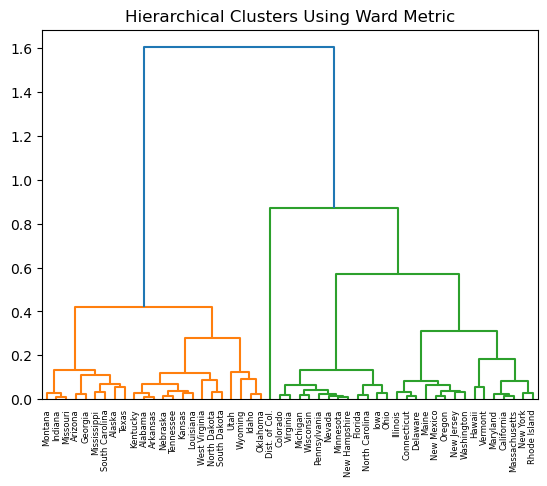

In [7]:
# Plot the dendrogram for the Ward proximity measure
# Get the linkage. Store the result in a variable called Z_ward_pct.
df_X_pct_copy = df_X_pct
df_X_pct_copy = df_X_pct_copy.drop('range', axis=1)

Z_ward_pct = linkage(df_X_pct_copy.values, method='ward')

# Plot the dendrogram. Store the result in a variable called dn_ward_pct.
dn_ward_pct = dendrogram(Z_ward_pct, labels=s_states_pct.to_list())
plt.figure(1,figsize=(15,10),FigureClass=dn_ward_pct)
plt.title("Hierarchical Clusters Using Ward Metric")
plt.show()

Text(0.5, 1.0, 'Hierarchical Clusters Using MIN Metric')

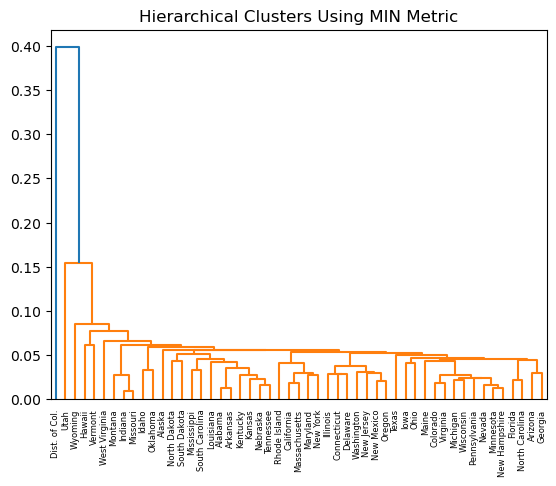

In [8]:
# Plot the dendrogram for the min proximity measure
# Get the linkage. Store the result in a variable called Z_min_pct.
df_X_pct_copy = df_X_pct
df_X_pct_copy = df_X_pct_copy.drop('range', axis=1)

Z_min_pct = linkage(df_X_pct.values, 'single')

# Plot the dendrogram. Store the result in a variable called dn_min_pct.
dn_min_pct = dendrogram(Z_min_pct,labels=s_states.to_list())
plt.figure(1,figsize=(15,10),FigureClass=dn_min_pct)
plt.title("Hierarchical Clusters Using MIN Metric")

Text(0.5, 1.0, 'Hierarchical Clusters Using MAX Metric')

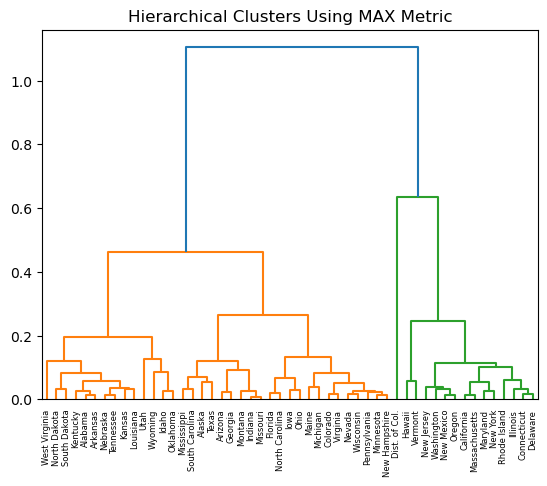

In [9]:
# Plot the dendrogram for the min proximity measure
# Get the linkage. Store the result in a variable called Z_min_pct.
df_X_pct_copy = df_X_pct
df_X_pct_copy = df_X_pct_copy.drop('range', axis=1)

Z_max_pct = linkage(df_X_pct_copy.values, 'complete')

# Plot the dendrogram. Store the result in a variable called dn_min_pct.
dn_max_pct = dendrogram(Z_max_pct,labels=s_states_pct.to_list())
plt.figure(1,figsize=(15,10),FigureClass=dn_max_pct)
plt.title("Hierarchical Clusters Using MAX Metric")

<!-- END QUESTION -->

## Q3 

**Calculate the Cophenetic Correlation Coefficient (CPCC)**
- Using the data from Q2 (creating hierarchical clusters on the percentage of Republican votes), calculate the **Cophenetic Correlation Coefficient** for each of these three methods.
- Print the results for each method.
- Describe how to interpret this metric.

*Hint*: You may use the scipy [`cophenet`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html) function with the output from [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) function as the `Y` parameter. 


In [10]:
Z = Z_ward_pct
Y = pdist(df_X_pct_copy)
cpcc_ward = cophenet(Z,Y)

Z = Z_min_pct
Y = pdist(df_X_pct_copy)
cpcc_min = cophenet(Z,Y)

Z = Z_max_pct
Y = pdist(df_X_pct_copy)
cpcc_max =cophenet(Z,Y)

In [11]:
print('CPCC Ward:', cpcc_ward)
print('CPCC Min:', cpcc_min)
print('CPCC Max:', cpcc_max)

CPCC Ward: (0.6027939021020979, array([0.42185876, 0.42185876, 0.01272771, ..., 1.60174936, 0.2808397 ,
       1.60174936]))
CPCC Min: (0.6887527790619649, array([0.05618547, 0.05593813, 0.01296599, ..., 0.06554072, 0.08481294,
       0.08481294]))
CPCC Max: (0.588042332992872, array([0.46337854, 0.46337854, 0.01272771, ..., 0.46337854, 0.19512122,
       0.46337854]))


<!-- END QUESTION -->

## Q4 

**Find new clusters based on k-means**

A political wonk has come to visit you in your data science dungeon, and looks over your shoulder.  They like what they see, and especially like the patterns from the Ward proximity diagram. Their team is going to come up with 4 different strategies based on the clustering that you have done.

But, your hierarchical clustering didn't naturally come up with a natural 4 clusters! So, you decide to use k-means to come up with the 4 clusters.  You choose these points to initialize your cluster centers based on the Ward proximity graph in your hierarchical clusters:
  - Montana
  - Arkansas
  - Massachusetts
  - Minnesota

**Use the dataset from Q2/Q3 (Republican percentages by state).**

Pass `random_state = 23` into the scikit-learn [KMeans function](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Print out your centroids before you pass them to K-Means. Print out the States that are in each k-means cluster.
- *Hint*: The `init` parameter can accept a DataFrame of initial centroid points.
- *Hint*: Make sure you drop the state name/index from `centroids` before passing it to $k$-means (a reset_index with `drop=True` should achieve this.)
- *Hint*: If you're on Windows and see a warning about a memory leak from KMeans, you can safely ignore this.


<!-- BEGIN QUESTION -->



In [114]:
# Find the centroids for the four states.
# Store the centroids in a Pandas DataFrame.
init_states = ('Montana', 'Arkansas', 'Massachusetts', 'Minnesota')

dd = pd.read_csv('republican_percentage_by_state.csv')
ddd = dd.loc[dd['State'].isin(init_states)]
centroids = pd.DataFrame(ddd)
centroids = centroids.drop('State', axis = 1)
centroids

,2016,2012,2008,range
3,0.625343,0.621544,0.601717,0.023625
21,0.338355,0.382143,0.368029,0.043788
23,0.471869,0.460588,0.447706,0.024163
26,0.575769,0.570342,0.511694,0.064075


In [115]:
# Compute the k-means clusters, and print the cluster assignment of each state.

s_centroid_assignment = KMeans(n_clusters=4, init = centroids, n_init= 1, random_state=23).fit(df_X_pct)
# The below code should print your clusters for you.
for i in range(4):
    print(f'Cluster {i}: ', end='')
    print(', '.join(s for s in s_states[s_centroid_assignment.labels_ == i].to_list()))

Cluster 0: Alabama, Arkansas, Idaho, Kentucky, Nebraska, North Dakota, Oklahoma, Tennessee, Utah, West Virginia, Wyoming
Cluster 1: California, Dist. of Col., Hawaii, Maryland, Massachusetts, New York, Rhode Island, Vermont
Cluster 2: Colorado, Connecticut, Delaware, Florida, Illinois, Iowa, Maine, Michigan, Minnesota, Nevada, New Hampshire, New Jersey, New Mexico, Ohio, Oregon, Pennsylvania, Virginia, Washington, Wisconsin
Cluster 3: Alaska, Arizona, Georgia, Indiana, Kansas, Louisiana, Mississippi, Missouri, Montana, North Carolina, South Carolina, South Dakota, Texas


<!-- END QUESTION -->

## Q5 

**Visualize the Silhouette Coefficients for Each Cluster**

Using the [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) implementation in sci-kit learn, calculate the silhouette coefficient for each of the States in our data frame using the clustering from Q4, and create a bar graph, similar to the [left plot in this link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Use the Silhouette Coefficient plot to identify clusters that have outliers.  Describe in a markdown cells how the visualization helped you identify the outlier points.  


<!-- BEGIN QUESTION -->



In [116]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Compute the silhouette scores for each sample
cluster_labels = s_centroid_assignment.fit_predict(df_X_pct)
sample_silhouette_values =  silhouette_samples(df_X_pct, cluster_labels)

# Compute the average sillhouette score (used for red line in the example)
silhouette_avg = silhouette_score(df_X_pct, cluster_labels)

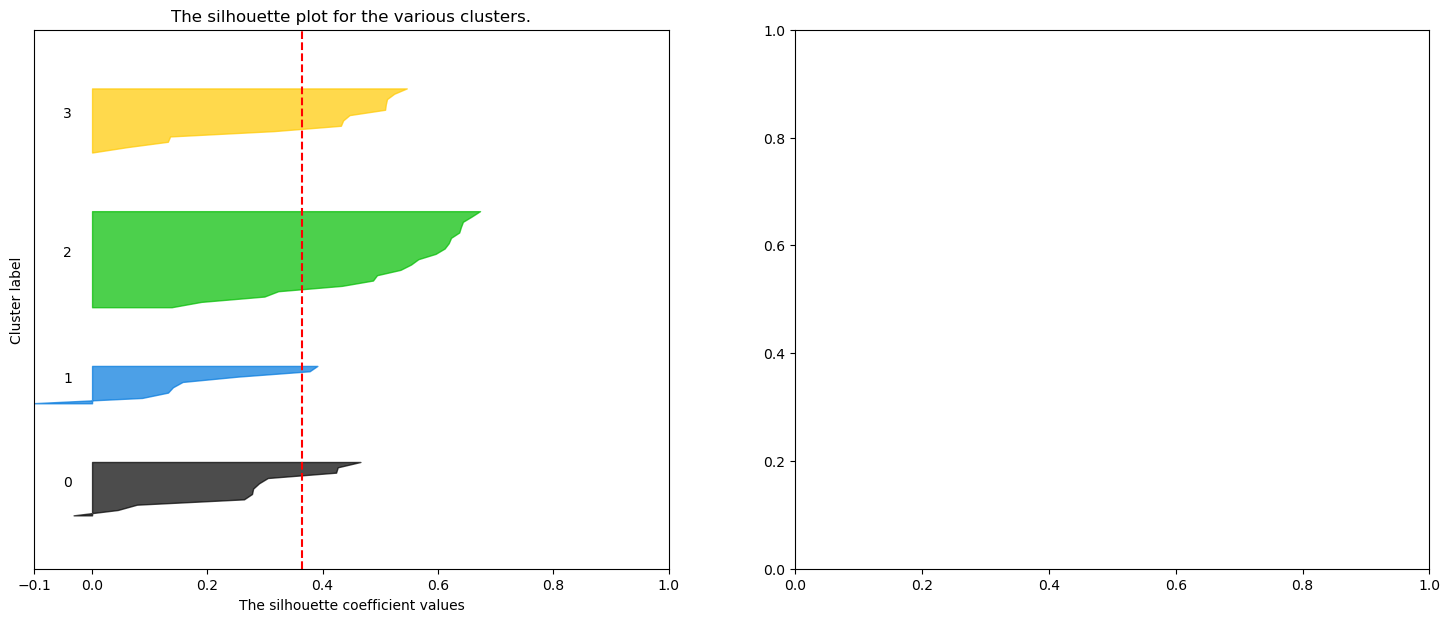

In [117]:
# Plot the sillhouette scores for each cluster.
y_lower = 10
n_clusters = 4
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df_X_pct) + (n_clusters + 1) * 10])
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

From the bar graph of the silhouette coefficients, I can see that clusters 1 and 0 have outliers since they have points that are less than 0 (going in the negative direction) meaning that they might be assigned to the wrong clusters. Also 1 and 0 have more of a jagged outline compared to clusters 2 and 3 and not as close in thickness as 2 and 3, indicating that 2 and 3 are plotted more correctly than 1 and 0.

<!-- END QUESTION -->

